## Mathematics of Machine Learning

### Chapter 3: Linear classification methods
### Section 3.4: Soft SVM Rule

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

#### (0) Data Preparation

Generate the training data

In [2]:
# Size of the dataset
m = 25

In [3]:
np.random.seed(17)
x = np.random.uniform(low=-3, high=3, size=(2, m))
print(x)

[[-1.23200998  0.18352053 -1.85087528 -2.59259785  1.72191276  0.93800113
   0.82512538  0.45361736 -2.7656225  -0.85311837  2.67409912 -2.63973192
   2.18425262  2.26374316 -2.69283801  0.91451169  0.31050821  0.58507952
  -0.09882825 -1.30207103 -1.21364569  0.36905343 -0.62371538  1.73220426
  -0.48909369]
 [-2.13657648 -2.09455983 -2.6685519   1.30822316 -1.24609587 -1.80735677
   1.98818353  0.40794672 -2.5059615   0.26999144 -2.04624753  1.06057431
  -2.28916641 -0.3300236   2.3278946   1.78360638 -2.59212763  2.76472654
   0.95523235  1.3126565   1.46146059  2.32641811 -2.19632599  1.66184748
   2.02794907]]


In [4]:
# true parameters
w_true = np.array([[1], [2]])
print(w_true)

[[1]
 [2]]


In [5]:
# Probabilities for label +1 according to the Bernoulli model with h_{w_true,0}
p = 1/(1 + np.exp(-(np.dot(w_true.T, x))))
print(p)

[[4.04926289e-03 1.78875806e-02 7.55044096e-04 5.05961836e-01
  3.16418759e-01 6.43615694e-02 9.91849503e-01 7.80658993e-01
  4.18863920e-04 4.22349587e-01 1.94913172e-01 3.73183568e-01
  8.36252261e-02 8.32534311e-01 8.76851986e-01 9.88812686e-01
  7.58666906e-03 9.97794367e-01 8.59559538e-01 7.89720579e-01
  8.46742289e-01 9.93451112e-01 6.58491361e-03 9.93668706e-01
  9.72529948e-01]]


In [6]:
# Dice out the random markers according to the probabilities p
y = 2*(np.random.uniform(low=0, high=1, size=(1, m)) <= p) - 1
print(y)

[[-1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1
   1]]


In [7]:
# load data
x = np.genfromtxt("data_svm_soft_X.csv", delimiter=',')
y = np.genfromtxt("data_svm_soft_Y.csv", delimiter=',')
y = np.array([y])
print(x)
print(y)

[[ 1.8883   -2.2381    0.79416  -1.329     2.745    -2.0543    2.743
   1.8017   -0.46943   1.7532    0.93444   2.0948    1.0724    1.4588
   0.93287   1.2363   -1.3385   -2.4172    1.169     2.7013   -0.36753
   1.5931   -1.8788   -0.32648   1.2562  ]
 [ 2.4348    2.4803   -2.4148    0.28129   2.7893    2.8236   -0.087746
  -2.1487    2.4944    2.757    -2.7857    2.604     1.5464   -0.64664
  -1.9729   -2.809    -2.723     1.9407   -1.0974   -2.7933   -0.71065
   1.7712   -0.061414  0.87788   1.5281  ]]
[[ 1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1.
   1. -1. -1.  1. -1.  1.  1.]]


#### (1) Soft SVM Rule

In [8]:
# both terms are equally weighted
lam = 1/m
print(lam)

0.04


In [9]:
# Define loss function
def hinge(w, x, y): 
    return np.amax(np.append(1 - np.multiply(y, np.dot(w.T, x)), np.zeros((1, m)), axis=0), axis=0)

In [10]:
# Determine the solution
def fun(w): return lam * np.linalg.norm(w)**2 + np.mean(hinge(w, x, y))

In [11]:
w_S, RS_min, iter, funcalls, warnflag = opt.fmin(fun, np.zeros((2, 1)), maxfun=100000, full_output=True)
print(w_S)

Optimization terminated successfully.
         Current function value: 0.230931
         Iterations: 71
         Function evaluations: 141
[-0.28983047  0.89269358]


In [12]:
w_S = np.array([[i] for i in w_S])

 #### (1.1) Plot the objective function

In [13]:
# discretize w1 and w2
w1 = np.array([[i] for i in np.arange(-10*abs(w_S[0]), 10*abs(w_S[0]) + 20*abs(w_S[0])/1000, 20*abs(w_S[0])/1000)]) 
w2 = np.array([[i] for i in np.arange(-10*abs(w_S[1]), 10*abs(w_S[1]) + 20*abs(w_S[1])/1000, 20*abs(w_S[1])/1000)]) 
print(w1.shape)
print(w2.shape)

(1001, 1)
(1001, 1)


In [14]:
# Generate discretization grid
WW1, WW2 = np.meshgrid(w1, w2)
W1 = np.ravel(WW1, order='F')
W2 = np.ravel(WW2, order='F')
FW = np.zeros((len(W1), 1))
print(FW.shape)

(1002001, 1)


In [15]:
for i in range(len(W1)):
    ww = np.array([[W1[i]], [W2[i]]])
    FW[i] = fun(ww)
print(FW.shape)

(1002001, 1)


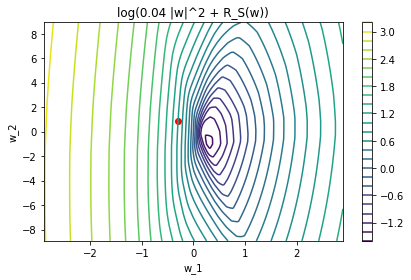

In [16]:
# Generate graphic (contour plot)
fig, ax = plt.subplots()

CS = ax.contour(WW1, WW2, np.reshape(np.log(FW), (len(w1), len(w2))), 25)
# ax.clabel(CS, inline=True, fontsize=10)

# plot learned value
ax.scatter(w_S[0], w_S[1], c="r")
# true
# ax.scatter(w_true[0], w_true[1], marker="+")

ax.set_title('log({:.2f} |w|^2 + R_S(w))'.format(lam))
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')

fig.colorbar(CS)
plt.tight_layout()
plt.show()

#### (2) Plot the training data

Optimization terminated successfully.
         Current function value: 0.193803
         Iterations: 67
         Function evaluations: 130


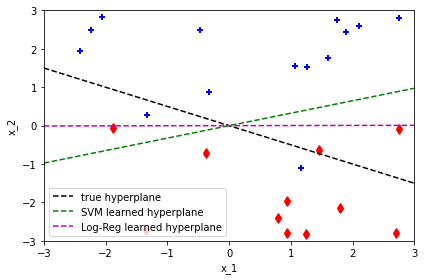

In [17]:
fig, ax = plt.subplots()

# First plot the true hyperplane for x in [-3,3]
ax.plot([-3,3], -w_true[0]/w_true[1]*[-3,3], "--k", label="true hyperplane")

# Plot the learned hypothesis
ax.plot([-3,3], -w_S[0]/w_S[1]*[-3,3], "--", c="g", label="SVM learned hyperplane")

# For comparison: plot logistic regression
def RS_log(w): return np.mean(np.log(1 + np.exp(- np.multiply(y, (np.dot(w.T, x))))), axis=1)
w_LR, RS_min, iter, funcalls, warnflag = opt.fmin(RS_log, np.zeros((2, 1)), maxfun=100000, full_output=True)
w_LR = np.array([[i] for i in w_LR])
ax.plot([-3,3], -w_LR[0]/w_LR[1]*[-3,3], "--", c="m", label="Log-Reg learned hyperplane")

# Then enter the classified points
inds = [i for (i, val) in enumerate(y[0]) if val == 1]
indm = [i for (i, val) in enumerate(y[0]) if val == -1]

ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="d", linewidths = 2)

plt.legend()
plt.xlabel("x_1")
plt.ylabel("x_2")

ax.set(xlim=(-3, 3), ylim=(-3, 3))
fig.tight_layout()